In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import category_encoders as ce

In [2]:
import pandas as pd

data = 'spam.csv'
df = pd.read_csv(data, encoding='latin1')  

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
colunm_drop=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df.drop(columns = colunm_drop, inplace = True)

In [6]:
df=df.rename(columns={'v1':'Category','v2':'Message'})
df.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [8]:
df['len']=df['Message'].apply(len)
df.head()

,Category,Message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
df['cate']=df.Category.map({'ham':0,'spam':1})
df.head()

,Category,Message,len,cate
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [10]:
x=df.Message
y=df.cate

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=11)

In [12]:
vect=CountVectorizer()
x_train=vect.fit_transform(x_train)
x_test=vect.transform(x_test)

In [13]:
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [14]:
gNB = GaussianNB()
gNB.fit(x_train.toarray(), y_train)

GaussianNB()

In [15]:
y_pred_test=gNB.predict(x_test.toarray())
print('aacuracy of test set:{0:0.4f}'.format(accuracy_score(y_test,y_pred_test)))

aacuracy of test set:0.8972


In [16]:
y_pred_train=gNB.predict(x_train.toarray())
print('aacuracy of train set:{0:0.4f}'.format(accuracy_score(y_train,y_pred_train)))

aacuracy of train set:0.9545


In [17]:
mnb=MultinomialNB(alpha=3)
mnb.fit(x_train.toarray(), y_train)

MultinomialNB(alpha=3)

In [18]:
y_pred_test_multi=mnb.predict(x_test.toarray())
print('aacuracy of test set:{0:0.4f}'.format(accuracy_score(y_test,y_pred_test_multi)))

aacuracy of test set:0.9853


In [19]:
y_pred_train_multi=mnb.predict(x_train.toarray())
print('aacuracy of train set:{0:0.4f}'.format(accuracy_score(y_train,y_pred_train_multi)))

aacuracy of train set:0.9874


In [20]:
cm = np.array(confusion_matrix(y_test,y_pred_test_multi,labels=[1,0]))
confusionM=pd.DataFrame(cm,index=['is ham','is spam'],columns=['predicted ham','predicted spam'])
confusionM

,predicted ham,predicted spam
is ham,201,26
is spam,1,1611


<Axes: >

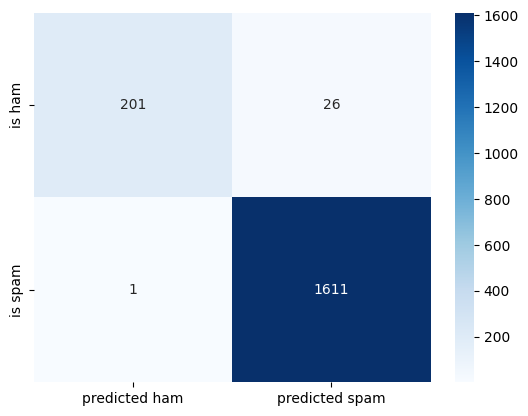

In [21]:
sns.heatmap(confusionM,annot=True ,fmt='d',cmap='Blues',cbar=True)

In [22]:
print(classification_report(y_test,y_pred_test_multi))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1612
           1       1.00      0.89      0.94       227

    accuracy                           0.99      1839
   macro avg       0.99      0.94      0.96      1839
weighted avg       0.99      0.99      0.98      1839

